In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [2]:
TURNS = 1000
samples = 100
bounds = 0.002 # [m]

In [3]:
files = os.listdir("out/quick_scan/")

In [ ]:
values = []
for f in tqdm(files):
    h5 = h5py.File(f"out/quick_scan/{f}", mode="r")
    stab = h5["stability"][:].reshape(100, 100)
    h5.close()

    plt.figure()
    plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
    plt.colorbar(label="log10(stability)")
    plt.title(f[:-3])
    plt.tight_layout()
    plt.savefig(f"img/quick_scan/{f[:-3]}.jpg")
    plt.close("all")

    s_mask = stab==TURNS
    values.append((f, np.count_nonzero(s_mask)))

In [8]:
sorted_vals = list(filter(lambda x: "b1" in x[0], sorted(values, key=lambda x: x[1])))
sorted_vals

element_min = sorted_vals[0][0]
element_max = sorted_vals[-1][0]
element_medium = sorted_vals[len(sorted_vals)//2][0]

/tmp/ipykernel_21837/1982189556.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
/tmp/ipykernel_21837/1982189556.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
/tmp/ipykernel_21837/1982189556.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])


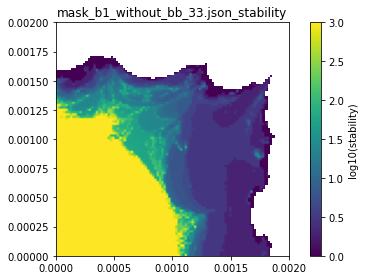

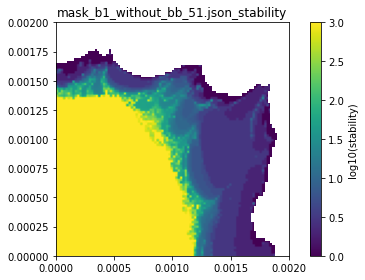

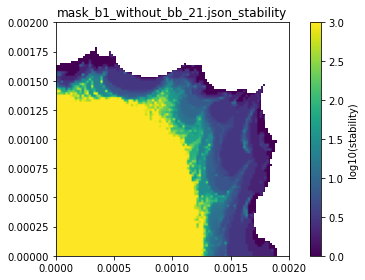

In [11]:
plt.figure()
with h5py.File(f"out/quick_scan/{element_min}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
plt.colorbar(label="log10(stability)")
plt.title(element_min[:-3])
plt.tight_layout()

plt.figure()
with h5py.File(f"out/quick_scan/{element_medium}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
plt.colorbar(label="log10(stability)")
plt.title(element_medium[:-3])
plt.tight_layout()

plt.figure()
with h5py.File(f"out/quick_scan/{element_max}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
plt.colorbar(label="log10(stability)")
plt.title(element_max[:-3])
plt.tight_layout()

In [13]:
print("min:", element_min)
print("medium:", element_medium)
print("max:", element_max)

NameError: name 'element_min' is not defined

In [14]:
selected_masks = [
    "mask_b1_without_bb_33.json",
    "mask_b1_without_bb_51.json",
    "mask_b1_without_bb_21.json",
]

100%|██████████| 3/3 [00:00<00:00, 11.54it/s]


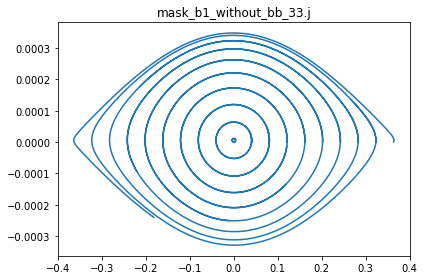

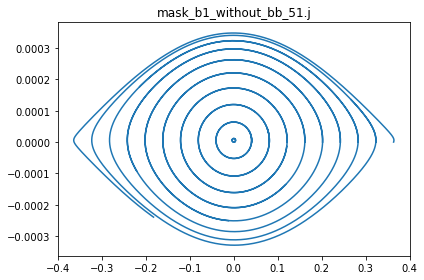

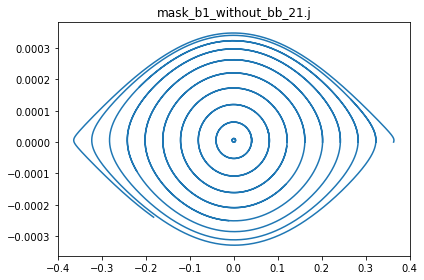

In [17]:
%matplotlib inline
values = []
for f in tqdm(selected_masks):
    h5 = h5py.File(f"out/longitudinal_scan/{f[:-5]}_stability.h5", mode="r")
    zeta = h5["zeta"][:]
    delta = h5["delta"][:]
    h5.close()

    plt.figure()
    for z, d in list(zip(zeta, delta))[::10]:
        plt.plot(z, d, c="C0")
    plt.title(f[:-3])
    plt.tight_layout()
    # plt.savefig(f"img/quick_scan/{f[:-3]}.jpg")
    # plt.close("all")

In [31]:
import pickle

with open("out/time_scan.pickle", "rb") as fid:
    time_scan = pickle.load(fid)

10 samples, 10 turns: 0.2825608253479004 s, 0.0028256082534790037 s/(turn*samples)
100 samples, 10 turns: 0.27840423583984375 s, 0.00027840423583984375 s/(turn*samples)
1000 samples, 10 turns: 0.31261181831359863 s, 3.126118183135986e-05 s/(turn*samples)
10000 samples, 10 turns: 0.3040645122528076 s, 3.040645122528076e-06 s/(turn*samples)
10 samples, 100 turns: 2.597114324569702 s, 0.002597114324569702 s/(turn*samples)
100 samples, 100 turns: 2.7626659870147705 s, 0.00027626659870147707 s/(turn*samples)
1000 samples, 100 turns: 3.0295040607452393 s, 3.0295040607452392e-05 s/(turn*samples)
10000 samples, 100 turns: 3.0285346508026123 s, 3.0285346508026124e-06 s/(turn*samples)
10 samples, 1000 turns: 25.963598489761353 s, 0.0025963598489761354 s/(turn*samples)
100 samples, 1000 turns: 27.612834692001343 s, 0.00027612834692001344 s/(turn*samples)
1000 samples, 1000 turns: 30.09770631790161 s, 3.009770631790161e-05 s/(turn*samples)
10000 samples, 1000 turns: 30.28639841079712 s, 3.02863984

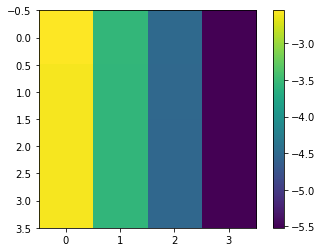

In [34]:
normed_times = np.array([t / (s * n) for s, n, t in time_scan])

for t, nt in zip(time_scan, normed_times):
    print(f"{t[0]} samples, {t[1]} turns: {t[2]} s, {nt} s/(turn*samples)")

plt.imshow(np.log10(normed_times).reshape(4,4))
plt.colorbar()

In [35]:
t_value = 3.029046003818512e-06

In [41]:
seconds = int(t_value * (300 * 300) * 1e5)
# print hours:minutes:seconds
print(f"{seconds // 3600}:{(seconds % 3600) // 60}:{seconds % 60}")

8:24:50


In [3]:
np.logspace(1, 5, 53, dtype=int)

array([    10,     11,     14,     17,     20,     24,     28,     34,
           41,     49,     58,     70,     83,    100,    119,    142,
          170,    203,    242,    289,    345,    412,    492,    587,
          701,    837,   1000,   1193,   1425,   1701,   2030,   2424,
         2894,   3455,   4124,   4923,   5878,   7017,   8376,  10000,
        11937,  14251,  17012,  20309,  24244,  28942,  34551,  41246,
        49238,  58780,  70170,  83767, 100000])

In [5]:
np.logspace(1, 2, 10, dtype=int)

array([ 10,  12,  16,  21,  27,  35,  46,  59,  77, 100])

In [8]:
t_samples = np.logspace(
        1,
        5,
        53
    )
t_samples = np.unique(np.round(t_samples).astype(int))
t_samples

array([    10,     12,     14,     17,     20,     24,     29,     35,
           41,     49,     59,     70,     84,    100,    119,    143,
          170,    203,    242,    289,    346,    412,    492,    588,
          702,    838,   1000,   1194,   1425,   1701,   2031,   2424,
         2894,   3455,   4125,   4924,   5878,   7017,   8377,  10000,
        11938,  14251,  17013,  20309,  24245,  28943,  34551,  41246,
        49239,  58780,  70170,  83768, 100000])

In [1]:
import numpy as np

import xobjects as xo
import xtrack as xt
import xpart as xp

## Generate a simple line
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 1.], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.RFMultipole(knl=[0, -1.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

## Choose a context
# context = xo.ContextCpu()         # For CPU
context = xo.ContextCupy()      # For CUDA GPUs
# context = xo.ContextPyopencl()  # For OpenCL GPUs

## Transfer lattice on context and compile tracking code
tracker = xt.Tracker(_context=context, line=line)


In [2]:
backtracker = tracker.get_backtracker()

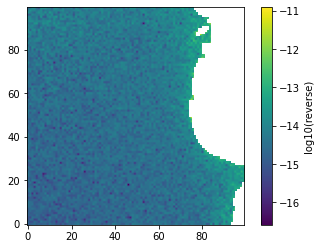

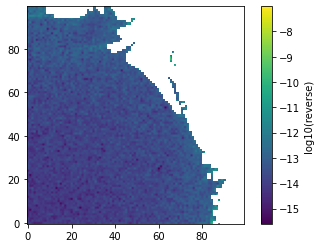

In [19]:
for t in [10, 100]:
    with h5py.File("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_test/rem_b1_worst.h5", mode="r") as h5:
        x = h5[f"reverse/x/{t}"][:]
        px = h5[f"reverse/px/{t}"][:]
        y = h5[f"reverse/y/{t}"][:]
        py = h5[f"reverse/py/{t}"][:]
        zeta = h5[f"reverse/zeta/{t}"][:]
        delta = h5[f"reverse/delta/{t}"][:]

        x0 = h5["reference/initial/x"][:]
        px0 = h5["reference/initial/px"][:]
        y0 = h5["reference/initial/y"][:]
        py0 = h5["reference/initial/py"][:]
        zeta0 = h5["reference/initial/zeta"][:]
        delta0 = h5["reference/initial/delta"][:]

    reverse = np.sqrt(
        (x - x0)**2 + (px - px0)**2 + (y - y0)**2 + (py - py0)**2
    )

    plt.figure()
    plt.imshow(np.log10(reverse).reshape(100, 100), origin="lower")
    plt.colorbar(label="log10(reverse)")

/tmp/ipykernel_25804/1312296597.py:11: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(disp_zeta/t).reshape(100, 100), origin="lower")


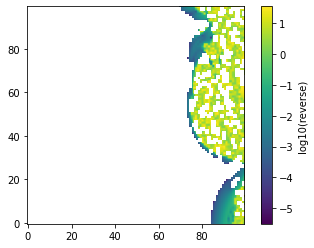

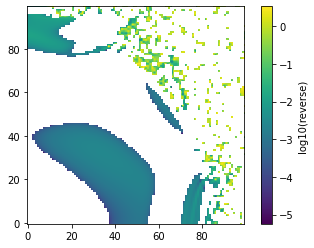

In [25]:
for t in [10, 100]:
    with h5py.File("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_test/log_displacement_b1_worst.h5", mode="r") as h5:
        disp_x = h5[f"disp/x/log_disp/{t}"][:]
        disp_px = h5[f"disp/px/log_disp/{t}"][:]
        disp_y = h5[f"disp/y/log_disp/{t}"][:]
        disp_py = h5[f"disp/py/log_disp/{t}"][:]
        disp_zeta = h5[f"disp/zeta/log_disp/{t}"][:]
        disp_delta = h5[f"disp/delta/log_disp/{t}"][:]

    plt.figure()
    plt.imshow(np.log10(disp_zeta/t).reshape(100, 100), origin="lower")
    plt.colorbar(label="log10(reverse)")

array([[0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
        0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
        0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
        0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
        0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
        0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
        0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
        0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
        0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
        0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
        0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
        0.70707071, 0.71717172, 0.72727273, 0.73

In [80]:
t = 100
with h5py.File("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_test/log_displacement_b1_worst.h5", mode="r") as h5:
    disp_x_x = h5[f"disp/x/normed_distance/x/{t}"][:]
    disp_x_px = h5[f"disp/x/normed_distance/px/{t}"][:]
    disp_x_y = h5[f"disp/x/normed_distance/y/{t}"][:]
    disp_x_py = h5[f"disp/x/normed_distance/py/{t}"][:]
    disp_x_zeta = h5[f"disp/x/normed_distance/zeta/{t}"][:]
    disp_x_delta = h5[f"disp/x/normed_distance/delta/{t}"][:]

    disp_px_x = h5[f"disp/px/normed_distance/x/{t}"][:]
    disp_px_px = h5[f"disp/px/normed_distance/px/{t}"][:]
    disp_px_y = h5[f"disp/px/normed_distance/y/{t}"][:]
    disp_px_py = h5[f"disp/px/normed_distance/py/{t}"][:]
    disp_px_zeta = h5[f"disp/px/normed_distance/zeta/{t}"][:]
    disp_px_delta = h5[f"disp/px/normed_distance/delta/{t}"][:]

    disp_y_x = h5[f"disp/y/normed_distance/x/{t}"][:]
    disp_y_px = h5[f"disp/y/normed_distance/px/{t}"][:]
    disp_y_y = h5[f"disp/y/normed_distance/y/{t}"][:]
    disp_y_py = h5[f"disp/y/normed_distance/py/{t}"][:]
    disp_y_zeta = h5[f"disp/y/normed_distance/zeta/{t}"][:]
    disp_y_delta = h5[f"disp/y/normed_distance/delta/{t}"][:]

    disp_py_x = h5[f"disp/py/normed_distance/x/{t}"][:]
    disp_py_px = h5[f"disp/py/normed_distance/px/{t}"][:]
    disp_py_y = h5[f"disp/py/normed_distance/y/{t}"][:]
    disp_py_py = h5[f"disp/py/normed_distance/py/{t}"][:]
    disp_py_zeta = h5[f"disp/py/normed_distance/zeta/{t}"][:]
    disp_py_delta = h5[f"disp/py/normed_distance/delta/{t}"][:]

    disp_zeta_x = h5[f"disp/zeta/normed_distance/x/{t}"][:]
    disp_zeta_px = h5[f"disp/zeta/normed_distance/px/{t}"][:]
    disp_zeta_y = h5[f"disp/zeta/normed_distance/y/{t}"][:]
    disp_zeta_py = h5[f"disp/zeta/normed_distance/py/{t}"][:]
    disp_zeta_zeta = h5[f"disp/zeta/normed_distance/zeta/{t}"][:]
    disp_zeta_delta = h5[f"disp/zeta/normed_distance/delta/{t}"][:]

    disp_delta_x = h5[f"disp/delta/normed_distance/x/{t}"][:]
    disp_delta_px = h5[f"disp/delta/normed_distance/px/{t}"][:]
    disp_delta_y = h5[f"disp/delta/normed_distance/y/{t}"][:]
    disp_delta_py = h5[f"disp/delta/normed_distance/py/{t}"][:]
    disp_delta_zeta = h5[f"disp/delta/normed_distance/zeta/{t}"][:]
    disp_delta_delta = h5[f"disp/delta/normed_distance/delta/{t}"][:]

In [81]:
def simple_gali(gali_matrix):
    if np.any(np.isnan(gali_matrix)):
        return np.nan
    else:
        _, s, _ = np.linalg.svd(gali_matrix)
        return np.prod(s)

In [82]:
gali_matrix = np.asarray([
    [disp_x_x, disp_x_px, disp_x_y, disp_x_py, disp_x_zeta, disp_x_delta],
    [disp_px_x, disp_px_px, disp_px_y, disp_px_py, disp_px_zeta, disp_px_delta],
    [disp_y_x, disp_y_px, disp_y_y, disp_y_py, disp_y_zeta, disp_y_delta],
    [disp_py_x, disp_py_px, disp_py_y, disp_py_py, disp_py_zeta, disp_py_delta],
    [disp_zeta_x, disp_zeta_px, disp_zeta_y, disp_zeta_py, disp_zeta_zeta, disp_zeta_delta],
    [disp_delta_x, disp_delta_px, disp_delta_y, disp_delta_py, disp_delta_zeta, disp_delta_delta],
])

In [83]:
gali_matrix.shape
# swap axes to get the right shape
gali_matrix = np.transpose(gali_matrix, (2, 0, 1))
gali_matrix.shape

(10000, 6, 6)

In [84]:
gali = []
for m in tqdm(gali_matrix):
    gali.append(simple_gali(m))
gali = np.asarray(gali)

100%|██████████| 10000/10000 [00:00<00:00, 19276.53it/s]


-1.2961945670524628
-inf


/tmp/ipykernel_25804/1060101547.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(gali).reshape(100, 100), origin="lower", vmin=-20)
/tmp/ipykernel_25804/1060101547.py:7: RuntimeWarning: divide by zero encountered in log10
  print(np.nanmax(np.log10(gali)))
/tmp/ipykernel_25804/1060101547.py:8: RuntimeWarning: divide by zero encountered in log10
  print(np.nanmin(np.log10(gali)))


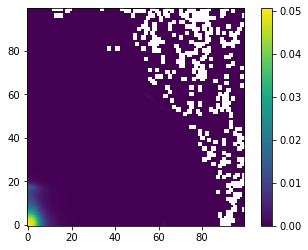

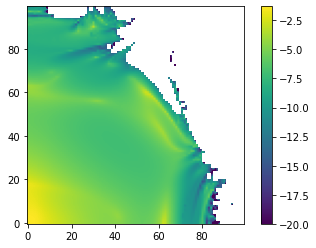

In [88]:
plt.figure()
plt.imshow((gali).reshape(100, 100), origin="lower")
plt.colorbar()

plt.figure()
plt.imshow(np.log10(gali).reshape(100, 100), origin="lower", vmin=-20)
print(np.nanmax(np.log10(gali)))
print(np.nanmin(np.log10(gali)))
plt.colorbar()

In [73]:
np.unique(np.linalg.norm([disp_x_x, disp_x_px, disp_x_y, disp_x_py, disp_x_zeta, disp_x_delta], axis=0))

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan])

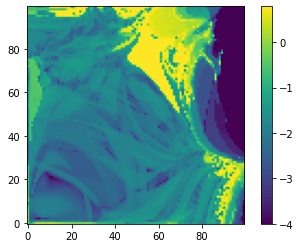

In [91]:
t = 100
with h5py.File("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_test/tune_b1_worst.h5", mode="r") as h5:
    tune_x_1 = h5[f"tune/x/0/{t//2}"][:]
    tune_x_2 = h5[f"tune/x/{t//2}/{t}"][:]
    tune_y_1 = h5[f"tune/y/0/{t//2}"][:]
    tune_y_2 = h5[f"tune/y/{t//2}/{t}"][:]

tune_diff = np.sqrt(
    (tune_x_1 - tune_x_2)**2 + (tune_y_1 - tune_y_2)**2
)

plt.figure()
plt.imshow(np.log10(tune_diff).reshape(100, 100), origin="lower", vmin=-4)
plt.colorbar()

In [92]:
def birkhoff_weights(n):
    weights = np.arange(n, dtype=np.float64)
    weights /= n
    weights = np.exp(-1 / (weights * (1 - weights)))
    return weights / np.sum(weights)

In [93]:
test = birkhoff_weights(1000)

/tmp/ipykernel_25804/3429502636.py:4: RuntimeWarning: divide by zero encountered in true_divide
  weights = np.exp(-1 / (weights * (1 - weights)))


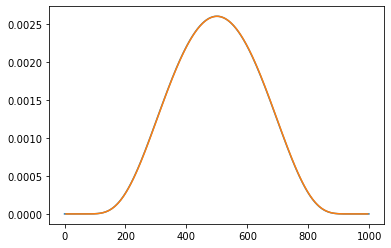

In [104]:
test

f_test = np.zeros_like(test)
for i in range(10):
    f_test += np.roll(test, -i)

f_test = f_test[::10]

plt.figure()
plt.plot(test)
plt.plot(np.arange(5, len(test)+5, 10), f_test/10)